[View in Colaboratory](https://colab.research.google.com/github/cagdasyetkin/timeseries/blob/master/London_powermeters.ipynb)

**TIME SERIES ANALYSIS WITH POWER METERS, PART 1**

To better follow the energy consumption, the government wants energy suppliers to install smart meters in every home in England, Wales and Scotland. There are more than 26 million homes for the energy suppliers to get to, with the goal of every home having a smart meter by 2020.

In this dataset, you will find a fraction of the data from the London data store, that contains the energy consumption readings for a sample of 50 London Households that took part in the UK Power Networks between November 2011 and February 2014. The data from the smart meters seems associated only to the electrical consumption.

The purpose of this notebook is to make you familiar with some building blocks of Time Series analysis. It follows a pedagogical flow.

I used Datacamp.com, AnalyticsVidhya.com and Kaggle.com as resource. The data itself is available on Kaggle.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving block_100.csv to block_100.csv


In this chunk number 100, the figures are given as daily aggregated numbers. There are lots of blocks of csv files. At the moment we are only looking at block number 100.

In [2]:
print (uploaded['block_100.csv'][:200].decode('utf-8') + '...')

LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
MAC002357,2012-04-27,0.1245,0.12908333333333333,0.28800000000000003,24,0.06526795382958968,3.098,0.034
MAC0...


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import io

df = pd.read_csv(io.StringIO(uploaded['block_100.csv'].decode('utf-8')))
df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC002357,2012-04-27,0.1245,0.129083,0.288,24,0.065268,3.098,0.034
1,MAC002357,2012-04-28,0.0850,0.128792,0.911,48,0.147929,6.182,0.033
2,MAC002357,2012-04-29,0.0875,0.110396,0.504,48,0.094689,5.299,0.034
3,MAC002357,2012-04-30,0.0795,0.111583,0.774,48,0.119959,5.356,0.034
4,MAC002357,2012-05-01,0.0795,0.110292,0.607,48,0.085291,5.294,0.034


LCLid s are the ID numbers of Power Meters. They have 1 record per day in this csv file. But how many power meters do we have here?

In [3]:
len(df.groupby(['LCLid']))

50

how many days?

In [5]:
len(df['day'].unique())

758

The complete dataset can be quite complex, so it is better to start small. One way to do it can be picking up one power meter randomly and looking into it. 

In [0]:
import random
random.seed(10)
my_powermeter = random.choice(df['LCLid'])

#pm stands for power meter

pm_data = df[df['LCLid'] == my_powermeter]

In [7]:
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 18174 to 18780
Data columns (total 9 columns):
LCLid            607 non-null object
day              607 non-null object
energy_median    607 non-null float64
energy_mean      607 non-null float64
energy_max       607 non-null float64
energy_count     607 non-null int64
energy_std       606 non-null float64
energy_sum       607 non-null float64
energy_min       607 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 47.4+ KB


convert the day column to date format

In [8]:
pm_data.day = pd.to_datetime(pm_data.day)

#and set index inplace!

pm_data.set_index('day', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
pm_data.head() #see that now date is the index


,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2012-07-02,MAC002906,0.1055,0.117143,0.251,28,0.060776,3.280,0.025
2012-07-03,MAC002906,0.0955,0.111500,0.343,48,0.071481,5.352,0.026
2012-07-04,MAC002906,0.1160,0.128292,0.432,48,0.076138,6.158,0.025
2012-07-05,MAC002906,0.0870,0.100396,0.231,48,0.057498,4.819,0.025
2012-07-06,MAC002906,0.0850,0.095479,0.230,48,0.050145,4.583,0.025


In [10]:
pm_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 607 entries, 2012-07-02 to 2014-02-28
Data columns (total 8 columns):
LCLid            607 non-null object
energy_median    607 non-null float64
energy_mean      607 non-null float64
energy_max       607 non-null float64
energy_count     607 non-null int64
energy_std       606 non-null float64
energy_sum       607 non-null float64
energy_min       607 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 42.7+ KB


Now we will see the distribution of median energy consumption and spot if there are some anomalies

In [11]:
pm_data['energy_median'].describe()

count    607.000000
mean       0.139263
std        0.051981
min        0.069000
25%        0.114500
50%        0.137000
75%        0.153500
max        0.767500
Name: energy_median, dtype: float64

It is a huge difference between the median and the max value. There is potentially something fishy there. A simple boxplot can help seeing that...

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


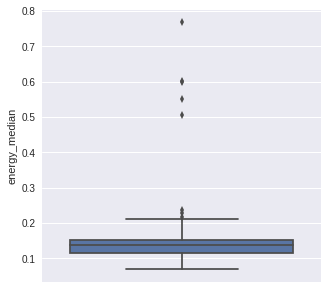

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(y = pm_data['energy_median'], data = pm_data)

We will replace those observations greater than 0.25 with 0.25 for this data at this point. They need more attention thou. Maybe these are not measurement errors but some special events which should not be excluded. However, we will do this manuplation for our exploration purposes. You can try median imputation for yourself.

In [13]:
pm_data['energy_median'] = [0.25 if i > 0.25 else i for i in pm_data['energy_median']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now try a bit of exploration without those outliers

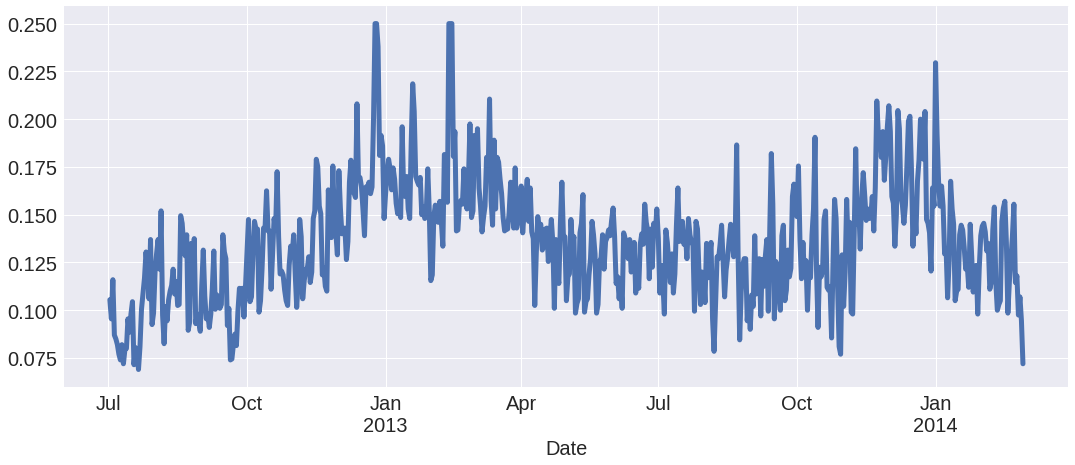

In [14]:
pm_data['energy_median'].plot(figsize=(18,7), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

This increase in winter confirms our intuition right? We can try some rolling average also, or moving average...

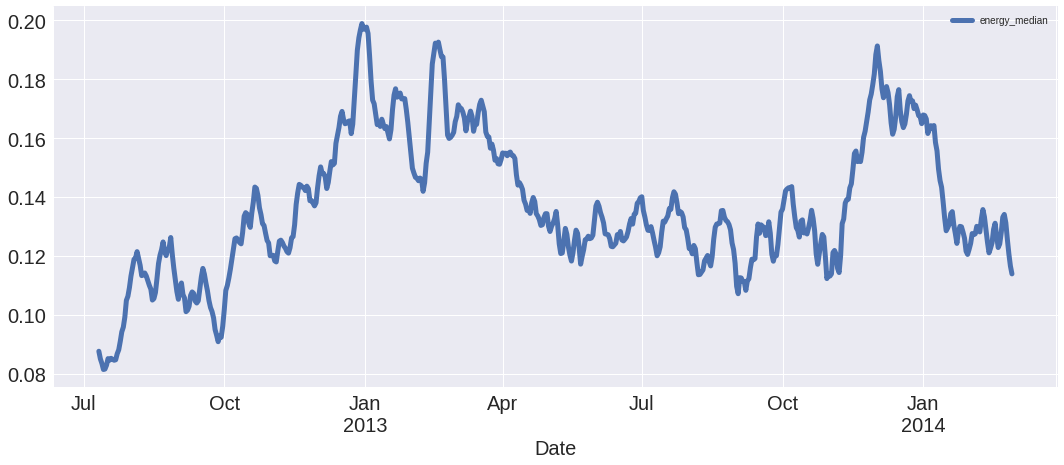

In [18]:
Median = pm_data[['energy_median']]
Median.rolling(10).mean().plot(figsize=(18,7), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

Detrending our data is easy by taking First-Differences. It is the difference between the successive data points.

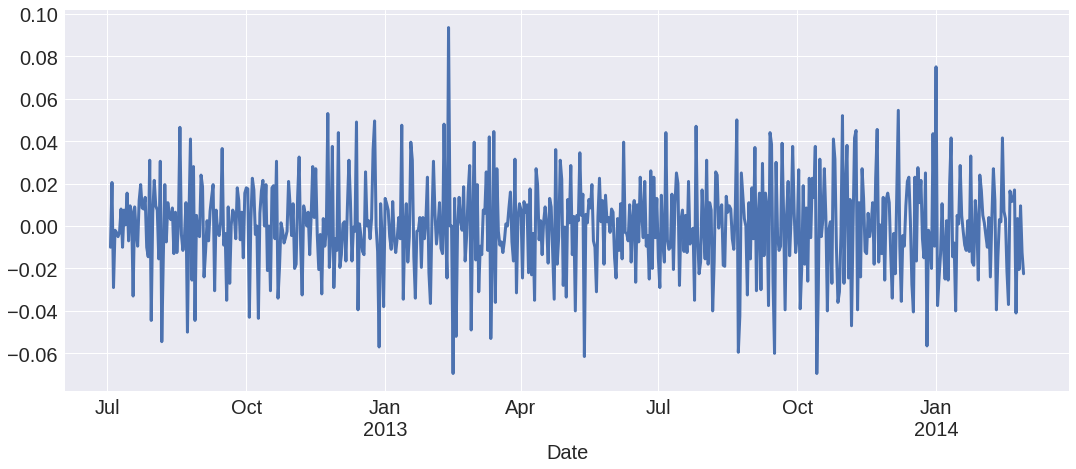

In [20]:
pm_data['energy_median'].diff().plot(figsize=(18,7), linewidth=3, fontsize=20)
plt.xlabel('Date', fontsize=20);

realize that the peaks in winter are still visible. That is up to 8-9% increase

Differencing is helpful in converting your time series into a stationary time series. Stationary data don't change over time. This is good because many time series forecasting methods are based on the assumption that the time series is approximately stationary. It can turn out that our data is already stationary and we dont need this transformation thou...

There is also a concept of autocorrelation. A time series is periodic if it repeats itself at equally spaced intervals like this one (every 12 months)

Another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

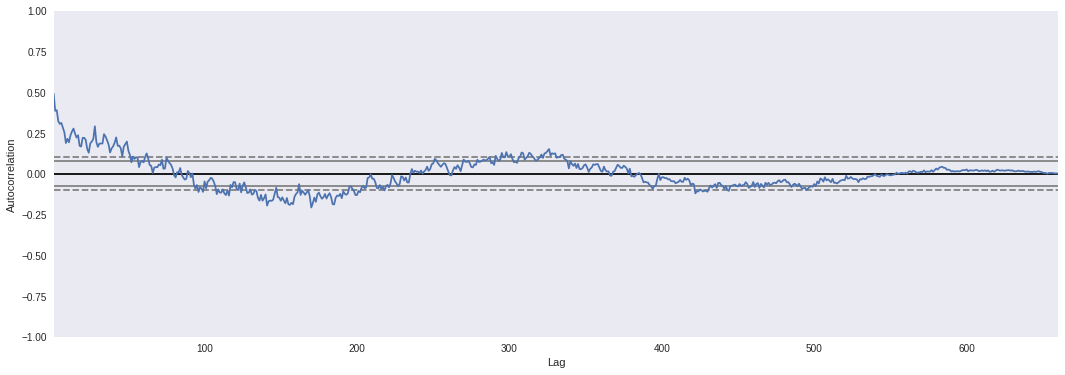

In [256]:
plt.figure(figsize=(18,6))
pd.plotting.autocorrelation_plot(pm_data['energy_median'])


The grey lines are the lines of statistical significance. We can say there is some autocorrelation until 50 lags. But we can not say that it is perfect as it is in a decline from 50% to 25%. If the blue line goes inside the grey lines then the autocorrelation is not significant.

Let's see if the trends are similar accross all these power meters first. From this line onwards we will look at daily total energy consumption, not the median.

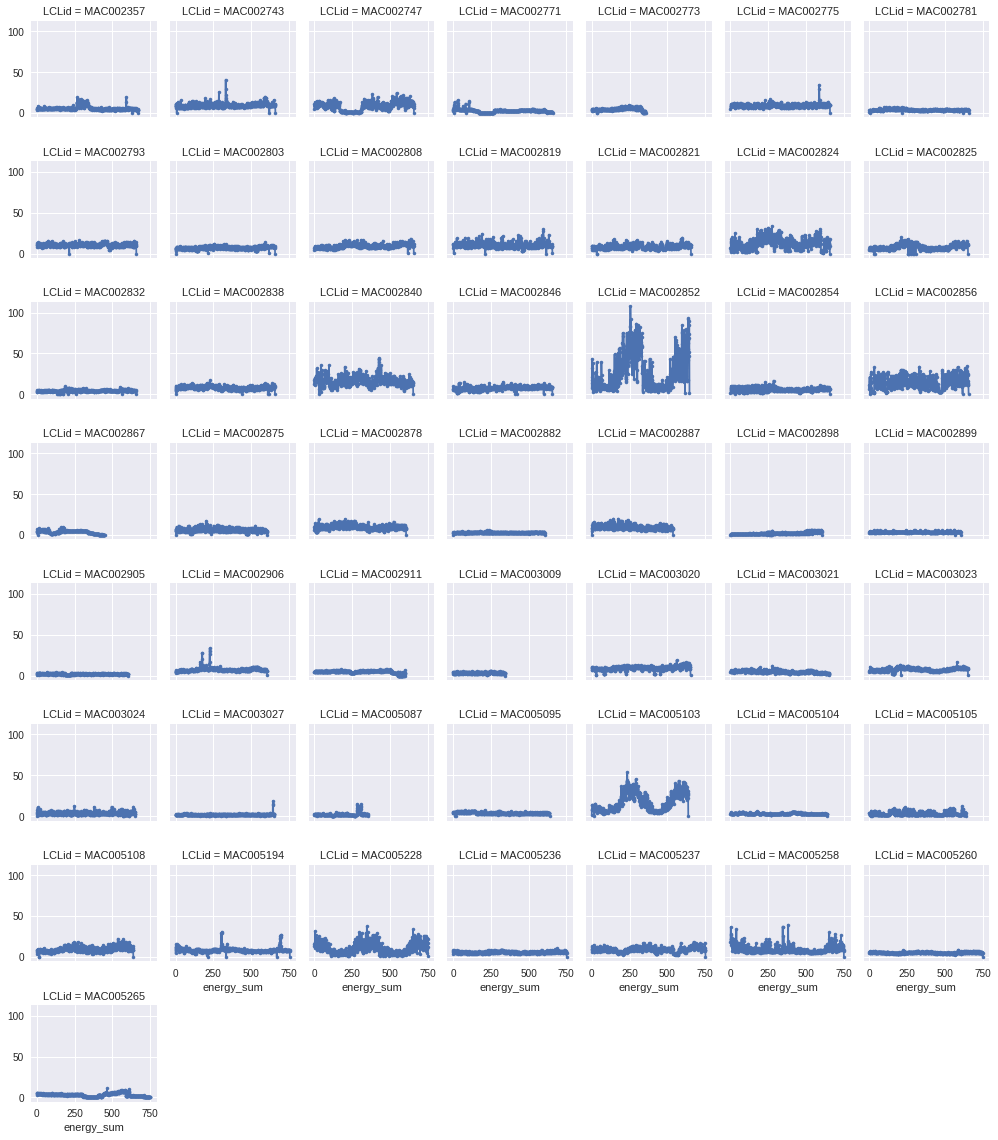

In [35]:
g = sns.FacetGrid(df, col="LCLid", col_wrap=7, size=2)
g = g.map(plt.plot, "energy_sum", marker=".")

In general we can say that there are big and small consumers. We observe curious spikes also time to time

In order to work on different power meters in a simpler way, we can create a small Class. First method in the class asks the power meter id to the user and makes a time series object. The other methods in the class replicate the plots by using that time series object 

In [0]:
#pm is a powermeter class

class pm():
  #assumes all above libraries are available
  
  def make_pm_df(df):
  
    powermeter_id = input()
    data = df[df['LCLid'] == powermeter_id]
    data.day = pd.to_datetime(data.day)
    data.set_index('day', inplace=True)
    return data
    

  def anomaly_checker(data, variable):
    plt.figure(figsize=(5,5))
    sns.boxplot(y = data[variable], data = data)

  def time_series_plotter(data, variable):
    data[variable].plot(figsize=(18,7), linewidth=5, fontsize=20)
    plt.xlabel('Date', fontsize=20);

  def moving_average_plotter(data, variable): 
    var = data[[variable]]
    var.rolling(10).mean().plot(figsize=(18,7), linewidth=5, fontsize=20)
    plt.xlabel('Date', fontsize=20);



"**STATIONARITY IS A BITCH!**"
   
   
   

Now sit back and relax before we continue. We will try to answer a few fundamental questions about time series. These are very different than panel data. First of all it has constant time intervals. We check it and see long term trends and forecast for the future. 

*   So the observations are **time dependent**! Remember linear regression assumes that the observations are independent.
*   There is **seasonality trends**. Remember ice cream sales change over time.

Dates are the index here and we can not shuffle them.

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

We will consider it stationary when it has

1.   constant mean
2.   constant variance
3.   an autocovariance that does not depend on time.


Let's now pick up one power meter see if it is stationary or not. The simplest way to do it is to apply a Dickey-Fuller Test. Here the null hypothesis is that the data is non-stationary. And the Alternate Hypothesis is that it is stationary.

A good news can be that our time series is stationary. It means we should be able to reject the null hypothesis. That can only happen if our p value is less than, say 5%...


In [16]:
#get your data for a power meter of your choice. We use the class we have created before
data = pm.make_pm_df(df)
data.head()

MAC005260


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2012-02-08,MAC005260,0.2340,0.226190,0.268,21,0.033905,4.750,0.119
2012-02-09,MAC005260,0.1170,0.114042,0.377,48,0.083343,5.474,0.026
2012-02-10,MAC005260,0.1315,0.134854,0.634,48,0.109166,6.473,0.026
2012-02-11,MAC005260,0.0825,0.100979,0.253,48,0.068673,4.847,0.026
2012-02-12,MAC005260,0.1145,0.112458,0.269,48,0.070538,5.398,0.026


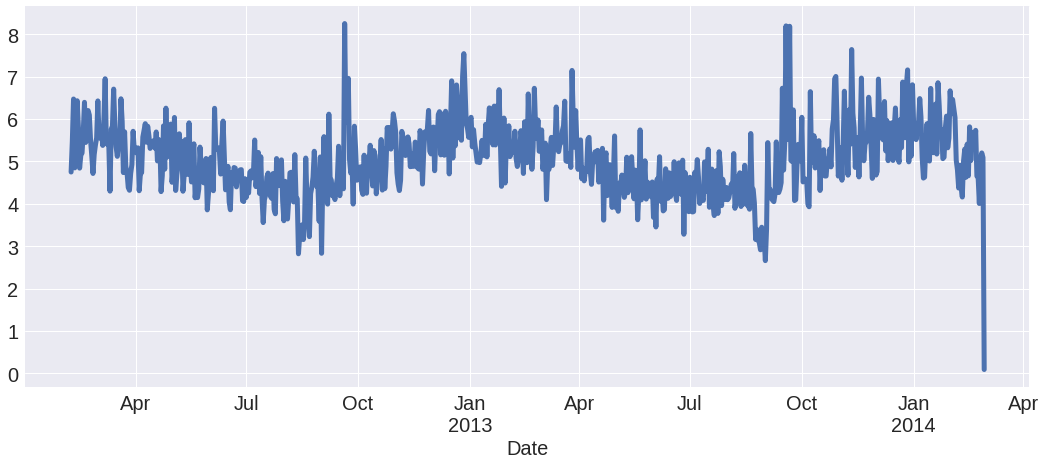

In [17]:
pm.time_series_plotter(data, 'energy_sum')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


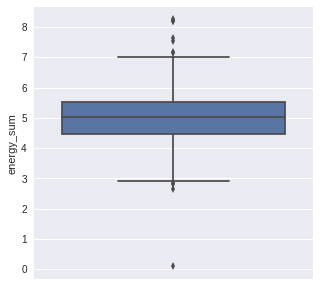

In [18]:
pm.anomaly_checker(data, 'energy_sum')

There is an anomaly just before the April, measuring Zero consumption. We will try to model continuous consumption and assume that noone is moving out. 

So lets filter them out. Let it go until Feb 15

In [0]:
data = data['2012-07-02':'2014-02-15']

In [20]:
#And apply the test

from pandas import Series
from statsmodels.tsa.stattools import adfuller

series = data['energy_sum']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.882180
p-value: 0.002170
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Here we can reject the null hypothesis, so our data is stationary. 

In fact many time series are not stationary. If that is the case, we try to take it as close as possible to stationary by playing with Trend and Seasonality. However, that is a subject of another tutorial.

Since we consider our data to be stationary with a confidence of greater than 99% already, we won't deal with these steps but proceed ahead.

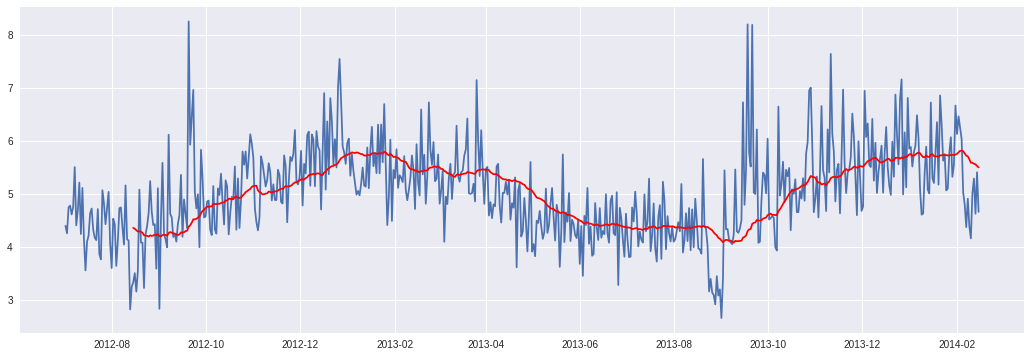

In [21]:
moving_avg = data[['energy_sum']].rolling(45).mean()
plt.figure(figsize=(18,6))
plt.plot(data['energy_sum'])
plt.plot(moving_avg, color='red');

Forecasting a Time Series

There are AR (auto regressive) models and MA (moving average) models. We will use the ARIMA function which handles and combines them. But what is ARIMA?

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

*   Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 4, the predictors for x(t) will be x(t-1)….x(t-5).
*   Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-4) where e(i) is the difference between the moving average at ith instant and actual value.
*   Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

*   Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
*   Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:


In [0]:
from statsmodels.tsa.arima_model import ARIMA

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(data['energy_sum'], nlags=10)
lag_pacf = pacf(data['energy_sum'], nlags=10, method='ols')

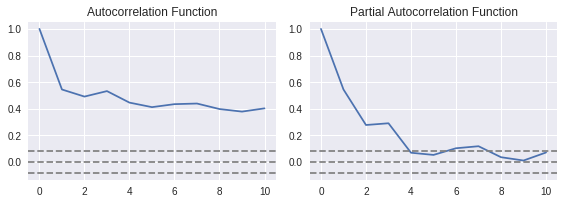

In [47]:
plt.figure(figsize=(8,3))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['energy_sum'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['energy_sum'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['energy_sum'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['energy_sum'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=4.

q – The lag value where the ACF chart does not cross the upper confidence interval. So, q=0.

p talks about AR and q talks about MA in ARIMA. Since q is zero and p is 4, this will be an AR model.


**THIS IS HOW THE FITTED VALUES LOOK LIKE IN RED COLOR:**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 246.1517')

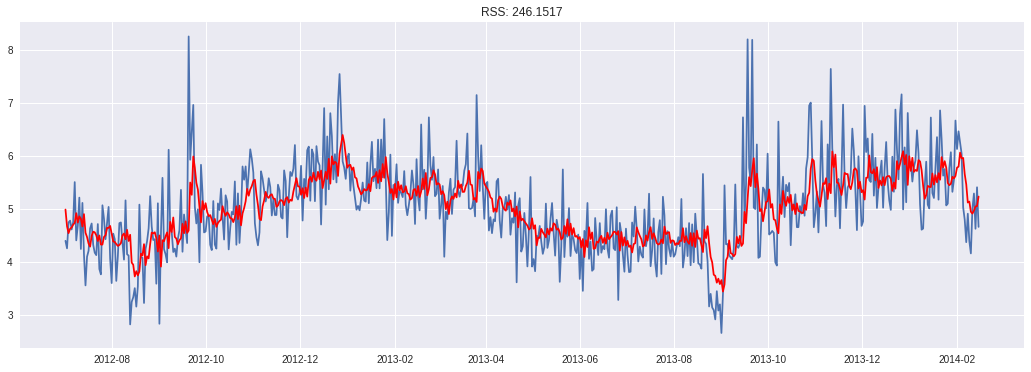

In [37]:
model = ARIMA(data['energy_sum'], order=(4, 0, 1))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(18,6))
plt.plot(data['energy_sum'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data['energy_sum'])**2))

**WE CAN ALSO VISUALIZE HOW IT IS FORECASTING:**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


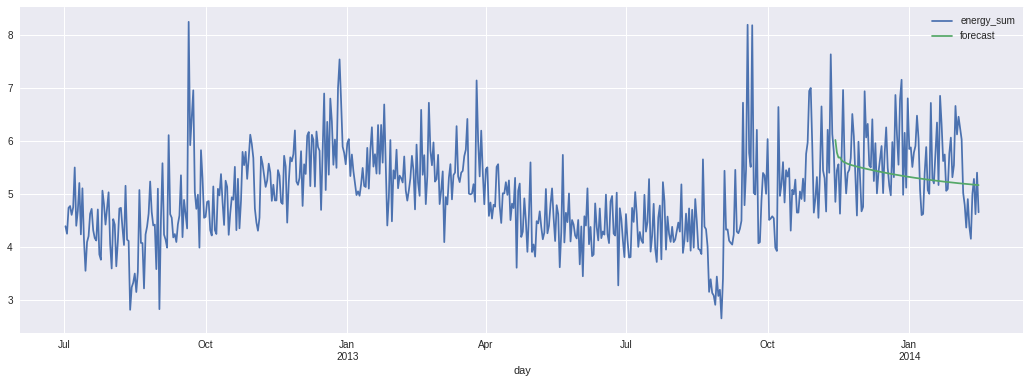

In [39]:
data['forecast'] = results_AR.predict(start = 500, end= 600, dynamic= True)  
data[['energy_sum', 'forecast']].plot(figsize=(18, 6))
plt.show()

**WE CAN SEE THE DIFFERENCES BETWEEN PREDICTED AND THE ACTUAL VALUES:**

In [244]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_AR_diff.tail())

day
2014-02-11    4.910127
2014-02-12    4.968389
2014-02-13    5.045446
2014-02-14    5.052934
2014-02-15    5.231859
dtype: float64


**WE CAN ADD MORE PARAMETERS IF WE DONT WANT IT THAT MUCH SMOOTH:**

In [0]:
import statsmodels.api as sm

# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(data['energy_sum'], trend='n', order=(4,0,1), seasonal_order=(1,1,1,12))
results = mod.fit()

**THEN THE FORECAST WILL LOOK LIKE THIS:**

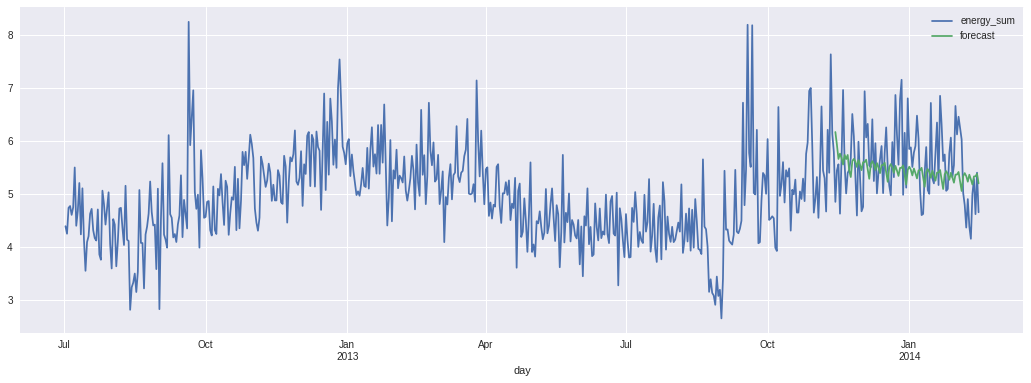

In [41]:
data['forecast'] = results.predict(start = 500, end= 600, dynamic= True)  
data[['energy_sum', 'forecast']].plot(figsize=(18, 6))
plt.show()

In the next tutorials we will try different models for different power meters, we will forecast for the future and bring together some ideas from other resources on the web. Please let me know about the problems you have spotted and then I will fix them.

Thank you for reading